In [19]:
import numpy as np
import pandas as pd
import datetime
from pandas import Timestamp
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
#Solar wind parameter of four case study
uri1 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/SW-Param_CME.csv'
uri2 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/SW-Param_SIR-HSS.csv'
uri3 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/SW-Param_Quiet.csv'
uri4 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/SW-Param_CME-CME.csv'
uri5 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Kp.csv'

#The best results of Bi-LSTM model
uri6 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_CME_BiLSTM.csv'
uri7 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_SIR_HSS_BiLSTM.csv'
uri8 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_Quiet_BiLSTM.csv'
uri9 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_CME_CME_BiLSTM.csv'

#The best results of GRU model
uri10 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_CME_GRU.csv'
uri11 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_SIR_HSS_GRU.csv'
uri12 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_Quiet_GRU.csv'
uri13 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/Best_result_CME_CME_GRU.csv'

#NRLMSIS 2.0 model
uri14 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/NRLMSIS_CME.csv'
uri15 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/NRLMSIS_SIR-HSS.csv'
uri16 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/NRLMSIS_Quiet.csv'
uri17 = 'https://raw.githubusercontent.com/PatapongPanpiboon/thermospheric-density/main/NRLMSIS_CME-CME.csv'

In [21]:
#DataFrame of solar wind parameter of four case study
sw_CME = pd.read_csv(uri1)
sw_CME.Date=pd.to_datetime(sw_CME.Date)
sw_CME.set_index('Date', inplace=True)

sw_SIR_HSS = pd.read_csv(uri2)
sw_SIR_HSS.Date=pd.to_datetime(sw_SIR_HSS.Date)
sw_SIR_HSS.set_index('Date', inplace=True)

sw_Quiet = pd.read_csv(uri3)
sw_Quiet.Date=pd.to_datetime(sw_Quiet.Date)
sw_Quiet.set_index('Date', inplace=True)

sw_CME_CME=pd.read_csv(uri4)
sw_CME_CME.Date=pd.to_datetime(sw_CME_CME.Date)
sw_CME_CME.set_index('Date', inplace=True)

dfKp = pd.read_csv(uri5)
dfKp.Date=pd.to_datetime(dfKp.Date)
dfKp.set_index('Date', inplace=True)

#DataFrame of the best results of Bi-LSTM model
df_CME_BiLSTM =pd.read_csv(uri6)
df_CME_BiLSTM.Date = pd.to_datetime(df_CME_BiLSTM.Date)
df_CME_BiLSTM.set_index('Date', inplace=True)

df_SIR_HSS_BiLSTM =pd.read_csv(uri7)
df_SIR_HSS_BiLSTM.Date = pd.to_datetime(df_SIR_HSS_BiLSTM.Date)
df_SIR_HSS_BiLSTM.set_index('Date', inplace=True)

df_Quiet_BiLSTM =pd.read_csv(uri8)
df_Quiet_BiLSTM.Date = pd.to_datetime(df_Quiet_BiLSTM.Date)
df_Quiet_BiLSTM.set_index('Date', inplace=True)

df_CME_CME_BiLSTM =pd.read_csv(uri9)
df_CME_CME_BiLSTM.Date = pd.to_datetime(df_CME_CME_BiLSTM.Date)
df_CME_CME_BiLSTM.set_index('Date', inplace=True)

#DataFrame of the best results of GRU model
df_CME_GRU =pd.read_csv(uri10)
df_CME_GRU.Date = pd.to_datetime(df_CME_GRU.Date)
df_CME_GRU.set_index('Date', inplace=True)

df_SIR_HSS_GRU =pd.read_csv(uri11)
df_SIR_HSS_GRU.Date = pd.to_datetime(df_SIR_HSS_GRU.Date)
df_SIR_HSS_GRU.set_index('Date', inplace=True)

df_Quiet_GRU =pd.read_csv(uri12)
df_Quiet_GRU.Date = pd.to_datetime(df_Quiet_GRU.Date)
df_Quiet_GRU.set_index('Date', inplace=True)

df_CME_CME_GRU =pd.read_csv(uri13)
df_CME_CME_GRU.Date = pd.to_datetime(df_CME_CME_GRU.Date)
df_CME_CME_GRU.set_index('Date', inplace=True)

#DataFrame of NRLMSIS 2.0 model
df_CME_NRLMSIS =pd.read_csv(uri14)
df_CME_NRLMSIS.Date = pd.to_datetime(df_CME_NRLMSIS.Date)
df_CME_NRLMSIS.set_index('Date', inplace=True)

df_SIR_HSS_NRLMSIS =pd.read_csv(uri15)
df_SIR_HSS_NRLMSIS.Date = pd.to_datetime(df_SIR_HSS_NRLMSIS.Date)
df_SIR_HSS_NRLMSIS.set_index('Date', inplace=True)

df_Quiet_NRLMSIS =pd.read_csv(uri16)
df_Quiet_NRLMSIS.Date = pd.to_datetime(df_Quiet_NRLMSIS.Date)
df_Quiet_NRLMSIS.set_index('Date', inplace=True)

df_CME_CME_NRLMSIS =pd.read_csv(uri17)
df_CME_CME_NRLMSIS.Date = pd.to_datetime(df_CME_CME_NRLMSIS.Date)
df_CME_CME_NRLMSIS.set_index('Date', inplace=True)

In [22]:
rho_max = 1.7165220290110206e-12

#Settig original value of Bi-LSTM model
df_CME_BiLSTM = df_CME_BiLSTM['Density_syn']*rho_max
df_SIR_HSS_BiLSTM = df_SIR_HSS_BiLSTM['Density_syn']*rho_max
df_Quiet_BiLSTM = df_Quiet_BiLSTM['Density_syn']*rho_max
df_CME_CME_BiLSTM = df_CME_CME_BiLSTM['Density_syn']*rho_max

#Settig original value of GRU model
df_CME_GRU = df_CME_GRU['Density_syn']*rho_max
df_SIR_HSS_GRU = df_SIR_HSS_GRU['Density_syn']*rho_max
df_Quiet_GRU = df_Quiet_GRU['Density_syn']*rho_max
df_CME_CME_GRU = df_CME_CME_GRU['Density_syn']*rho_max

**CME event**

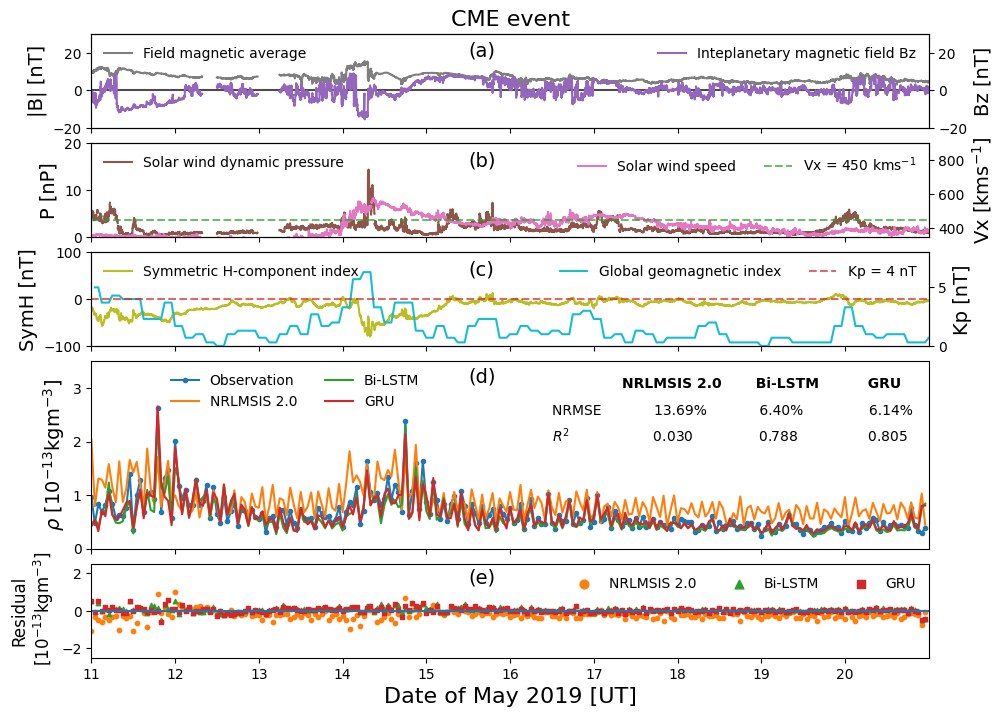

In [23]:
y_true  = df_CME_NRLMSIS['Density']
y_model = df_CME_NRLMSIS['Density_model']
y_pred = df_CME_BiLSTM
y_pred_GRU = df_CME_GRU
####################### NRLMSIS 2.0  #################################
#NRMSE
MSE_model = mean_squared_error(y_true, y_model)
RMSE_model = np.sqrt(MSE_model)
NRMSE_model = RMSE_model/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_model = r2_score(y_true, y_model)
###################### Evaluion with BiLSTM ########################
#NRMSE
MSE_BiLSTM = mean_squared_error(y_true, y_pred)
RMSE_BiLSTM = np.sqrt(MSE_BiLSTM)
NRMSE_BiLSTM = RMSE_BiLSTM/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_BiLSTM = r2_score(y_true, y_pred)
###################### Evaluion with GRU ###########################
#NRMSE
MSE_GRU = mean_squared_error(y_true, y_pred_GRU)
RMSE_GRU = np.sqrt(MSE_GRU)
NRMSE_GRU = RMSE_GRU/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_GRU = r2_score(y_true, y_pred_GRU)
#####################################################################
#Create figure
f, (axes5, axes2,axes3,axes4,axes1) = plt.subplots(5, 1, figsize=(10, 7), \
                        sharex=True, gridspec_kw={'height_ratios': [1,1,1,2,1]})

axes4.plot(df_CME_NRLMSIS.index, df_CME_NRLMSIS['Density']*1e13, marker = '.',
          label = "Observation")
axes4.plot(df_CME_NRLMSIS.index, df_CME_NRLMSIS['Density_model']*1e13,
          label = "NRLMSIS 2.0")
axes4.plot(df_CME_NRLMSIS.index, 1e13*df_CME_BiLSTM,
          label = "Bi-LSTM")
axes4.plot(df_CME_NRLMSIS.index, 1e13*df_CME_GRU,
          label = "GRU")

axes4.set_ylim(0,3.5)

#Shows evaluion
axes4.text(Timestamp('2019-05-17 08:00:00'), 3.0, 'NRLMSIS 2.0'f'{" ":7}'
                                                 'Bi-LSTM' f'{" ":10}'
                                                 'GRU', size=10, weight='bold')
axes4.text(Timestamp('2019-05-16 12:00:00'), 2.5, 'NRMSE' f'{" ":12}'
                                                          '{:.2%}'.format(NRMSE_model)+f'{" ":12}'+
                                                          '{:.2%}'.format(NRMSE_BiLSTM)+f'{" ":15}'+
                                                          '{:.2%}'.format(NRMSE_GRU), size=10)
axes4.text(Timestamp('2019-05-16 12:00:00'), 2.0, '$R^2$ ' f'{" ":18}'
                                                        '{:.3f}'.format(R_SQURE_model)+f'{" ":15}'+
                                                        '{:.3f}'.format(R_SQURE_BiLSTM)+f'{" ":16}'+
                                                        '{:.3f}'.format(R_SQURE_GRU), size=10)

axes4.set_ylabel(r'$\rho$' " [$\mathregular{10^{-13} kgm^{-3}}$]", size=14)
axes1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
axes1.set_xlabel('Date of May 2019 [UT]', size=16)
axes4.legend(facecolor='None',edgecolor='None', loc='upper left',bbox_to_anchor =(0.08, 1), ncol=2)
axes5.set_title('CME event', size=16
               , loc='center')

axes2_2 = axes2.twinx()
axes3_2 = axes3.twinx()
axes5_2 = axes5.twinx()
#############################################
axes5.plot(sw_CME.index, sw_CME.Btotal, color='tab:gray')
axes5.set_ylim(-20,30)
axes5.set_ylabel("|B| [nT]", size=14)
axes5.legend(['Field magnetic average'],loc='upper left', facecolor='None', edgecolor='None')

axes5_2.plot(sw_CME.index, sw_CME.Bz, color='tab:purple')
axes5_2.set_ylim(-20,30)
axes5_2.set_ylabel("Bz [nT]", size=14)
axes5_2.legend(['Inteplanetary magnetic field Bz'],loc='upper right', facecolor='None', edgecolor='None')
axes5.axhline(y=0, color="black", linestyle="-", alpha=0.7)
#############################################
axes1.scatter(df_CME_NRLMSIS.index, df_CME_NRLMSIS['Density']*1e13-df_CME_NRLMSIS['Density_model']*1e13,
              color='tab:orange', alpha=1, s=10)
axes1.scatter(df_CME_NRLMSIS.index, df_CME_NRLMSIS['Density']*1e13-1e13*df_CME_BiLSTM, marker = '^',
              color='tab:green', alpha=1, s=10)
axes1.scatter(df_CME_NRLMSIS.index, df_CME_NRLMSIS['Density']*1e13-1e13*df_CME_GRU, marker = 's',
              color='tab:red', alpha=1, s=10)
axes1.set_ylim(-2.5,2.5)
axes1.set_ylabel('Residual\n' " [$\mathregular{10^{-13} kgm^{-3}}$]", size=12)
axes1.legend(['NRLMSIS 2.0', 'Bi-LSTM', 'GRU'],markerscale=2 ,loc='upper right',
             edgecolor='white',ncol = 3)
axes1.axhline(y=0, color="tab:blue", linestyle="-", alpha=1)
#############################################
axes2.plot(sw_CME.index, sw_CME.P, color='tab:brown')
axes2.set_ylim(0,20)
axes2.set_ylabel("P [nP]", size=14)
axes2.legend(['Solar wind dynamic pressure'],loc='upper left',edgecolor='white')

axes2_2.plot(sw_CME.index, np.abs(sw_CME.Vx), color='tab:pink')
axes2_2.set_ylim(350,900)
axes2_2.set_ylabel("Vx [$\mathregular{km s^{-1}}$]", size=14)
axes2_2.axhline(y=450, color="tab:green", linestyle="--", alpha=0.7)
axes2_2.legend(['Solar wind speed','Vx = 450 $\mathregular{km s^{-1}}$'],
               loc='upper right',edgecolor='white', ncol = 2)
#############################################
axes3.plot(sw_CME.index, sw_CME.SymH, color='tab:olive')
axes3.set_ylim(-100,100)
axes3.set_ylabel("SymH [nT]", size=14)
axes3.legend(['Symmetric H-component index'], loc='upper left',edgecolor='white')

axes3_2.plot(dfKp.loc['2019-05-11':'2019-05-20'].index, dfKp.Kp.loc['2019-05-11':'2019-05-20']/10,  color='tab:cyan')
axes3_2.set_ylim(0,8)
axes3_2.set_ylabel("Kp [nT]", size=14)
axes3_2.axhline(y=4.0, color="tab:red", linestyle="--", alpha=0.7)
axes3_2.legend(['Global geomagnetic index','Kp = 4 nT'],loc='upper right',edgecolor='white', ncol = 2)

axes5.text(Timestamp('2019-05-15 12:00:00'), 18, '(a)', size=14)
axes2.text(Timestamp('2019-05-15 12:00:00'), 15, '(b)', size=14)
axes3.text(Timestamp('2019-05-15 12:00:00'), 50, '(c)', size=14)
axes4.text(Timestamp('2019-05-15 12:00:00'), 3.1, '(d)', size=14)
axes1.text(Timestamp('2019-05-15 12:00:00'), 1.5, '(e)', size=14)

axes2_2.margins(0, 0)
axes3_2.margins(0, 0)
axes5_2.margins(0, 0)
axes1.margins(0, 0)
axes2.margins(0, 0)
axes3.margins(0, 0)
axes4.margins(0, 0)
axes5.margins(0, 0)
plt.tight_layout(pad=0.1)
plt.show()

**SIR-HSS event**

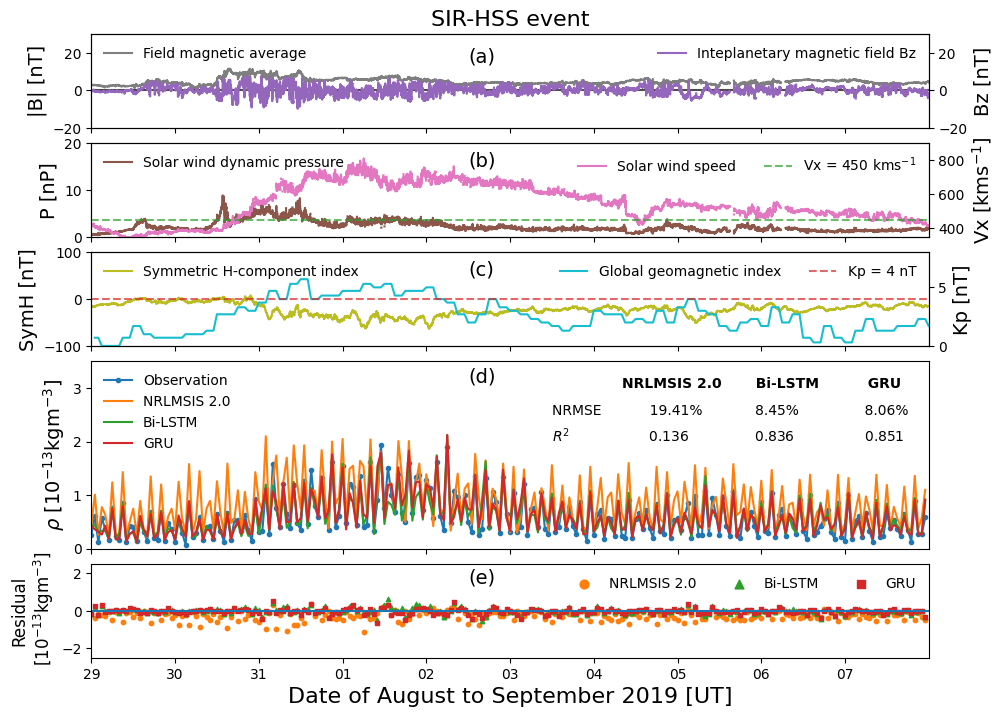

In [24]:
y_true  = df_SIR_HSS_NRLMSIS['Density']
y_model = df_SIR_HSS_NRLMSIS['Density_model']
y_pred = df_SIR_HSS_BiLSTM
y_pred_GRU = df_SIR_HSS_GRU
####################### NRLMSIS 2.0  #################################
#NRMSE
MSE_model = mean_squared_error(y_true, y_model)
RMSE_model = np.sqrt(MSE_model)
NRMSE_model = RMSE_model/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_model = r2_score(y_true, y_model)
###################### Evaluion with BiLSTM ########################
#NRMSE
MSE_BiLSTM = mean_squared_error(y_true, y_pred)
RMSE_BiLSTM = np.sqrt(MSE_BiLSTM)
NRMSE_BiLSTM = RMSE_BiLSTM/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_BiLSTM = r2_score(y_true, y_pred)
###################### Evaluion with GRU ###########################
#NRMSE
MSE_GRU = mean_squared_error(y_true, y_pred_GRU)
RMSE_GRU = np.sqrt(MSE_GRU)
NRMSE_GRU = RMSE_GRU/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_GRU = r2_score(y_true, y_pred_GRU)
#####################################################################
#Create figure
f, (axes5, axes2,axes3,axes4,axes1) = plt.subplots(5, 1, figsize=(10, 7), \
                        sharex=True, gridspec_kw={'height_ratios': [1,1,1,2,1]})

axes4.plot(df_SIR_HSS_NRLMSIS.index, df_SIR_HSS_NRLMSIS['Density']*1e13, marker = '.',
          label = "Observation")
axes4.plot(df_SIR_HSS_NRLMSIS.index, df_SIR_HSS_NRLMSIS['Density_model']*1e13,
          label = "NRLMSIS 2.0")
axes4.plot(df_SIR_HSS_NRLMSIS.index, 1e13*df_SIR_HSS_BiLSTM,
          label = "Bi-LSTM")
axes4.plot(df_SIR_HSS_NRLMSIS.index, 1e13*df_SIR_HSS_GRU,
          label = "GRU")

axes4.set_ylim(0,3.5)

#Shows evaluion
axes4.text(Timestamp('2019-09-04 08:00:00'), 3.0, 'NRLMSIS 2.0'f'{" ":7}'
                                                 'Bi-LSTM' f'{" ":10}'
                                                 'GRU', size=10, weight='bold')
axes4.text(Timestamp('2019-09-03 12:00:00'), 2.5, 'NRMSE' f'{" ":11}'
                                                          '{:.2%}'.format(NRMSE_model)+f'{" ":12}'+
                                                          '{:.2%}'.format(NRMSE_BiLSTM)+f'{" ":15}'+
                                                          '{:.2%}'.format(NRMSE_GRU), size=10)
axes4.text(Timestamp('2019-09-03 12:00:00'), 2.0, '$R^2$ ' f'{" ":17}'
                                                        '{:.3f}'.format(R_SQURE_model)+f'{" ":15}'+
                                                        '{:.3f}'.format(R_SQURE_BiLSTM)+f'{" ":16}'+
                                                        '{:.3f}'.format(R_SQURE_GRU), size=10)

axes4.set_ylabel(r'$\rho$' " [$\mathregular{10^{-13} kgm^{-3}}$]", size=14)
axes4.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
axes1.set_xlabel('Date of August to September 2019 [UT]', size=16)
axes4.legend(edgecolor='white', loc='upper left')
axes5.set_title('SIR-HSS event', size=16
               , loc='center')

axes2_2 = axes2.twinx()
axes3_2 = axes3.twinx()
axes5_2 = axes5.twinx()
#############################################
axes5.plot(sw_SIR_HSS.index, sw_SIR_HSS.Btotal, color='tab:gray')
axes5.set_ylim(-20,30)
axes5.set_ylabel("|B| [nT]", size=14)
axes5.legend(['Field magnetic average'],loc='upper left', facecolor='None', edgecolor='None')

axes5_2.plot(sw_SIR_HSS.index, sw_SIR_HSS.Bz, color='tab:purple')
axes5_2.set_ylim(-20,30)
axes5_2.set_ylabel("Bz [nT]", size=14)
axes5_2.legend(['Inteplanetary magnetic field Bz'],loc='upper right', facecolor='None', edgecolor='None')
axes5.axhline(y=0, color="black", linestyle="-", alpha=0.7)
#############################################
axes1.scatter(df_SIR_HSS_NRLMSIS.index, df_SIR_HSS_NRLMSIS['Density']*1e13-df_SIR_HSS_NRLMSIS['Density_model']*1e13,
              color='tab:orange', alpha=1, s=10)
axes1.scatter(df_SIR_HSS_NRLMSIS.index, df_SIR_HSS_NRLMSIS['Density']*1e13-1e13*df_SIR_HSS_BiLSTM, marker = '^',
              color='tab:green', alpha=1, s=10)
axes1.scatter(df_SIR_HSS_NRLMSIS.index, df_SIR_HSS_NRLMSIS['Density']*1e13-1e13*df_SIR_HSS_GRU, marker = 's',
              color='tab:red', alpha=1, s=10)
axes1.set_ylim(-2.5,2.5)
axes1.set_ylabel('Residual\n' " [$\mathregular{10^{-13} kgm^{-3}}$]", size=12)
axes1.legend(['NRLMSIS 2.0', 'Bi-LSTM', 'GRU'],markerscale=2 ,loc='upper right',
             edgecolor='white',ncol = 3)
axes1.axhline(y=0, color="tab:blue", linestyle="-", alpha=1)
#############################################
axes2.plot(sw_SIR_HSS.index, sw_SIR_HSS.P, color='tab:brown')
axes2.set_ylim(0,20)
axes2.set_ylabel("P [nP]", size=14)
axes2.legend(['Solar wind dynamic pressure'],loc='upper left',edgecolor='white')

axes2_2.plot(sw_SIR_HSS.index, np.abs(sw_SIR_HSS.Vx), color='tab:pink')
axes2_2.set_ylim(350,900)
axes2_2.set_ylabel("Vx [$\mathregular{km s^{-1}}$]", size=14)
axes2_2.axhline(y=450, color="tab:green", linestyle="--", alpha=0.7)
axes2_2.legend(['Solar wind speed','Vx = 450 $\mathregular{km s^{-1}}$'],
               loc='upper right',edgecolor='white', ncol = 2)
#############################################
axes3.plot(sw_SIR_HSS.index, sw_SIR_HSS.SymH, color='tab:olive')
axes3.set_ylim(-100,100)
axes3.set_ylabel("SymH [nT]", size=14)
axes3.legend(['Symmetric H-component index'], loc='upper left',edgecolor='white')

axes3_2.plot(dfKp.loc['2019-08-29':'2019-09-07'].index, dfKp.Kp.loc['2019-08-29':'2019-09-07']/10,  color='tab:cyan')
axes3_2.set_ylim(0,8)
axes3_2.set_ylabel("Kp [nT]", size=14)
axes3_2.axhline(y=4.0, color="tab:red", linestyle="--", alpha=0.7)
axes3_2.legend(['Global geomagnetic index','Kp = 4 nT'],loc='upper right',edgecolor='white', ncol = 2)

axes5.text(Timestamp('2019-09-02 12:00:00'), 15, '(a)', size=14)
axes2.text(Timestamp('2019-09-02 12:00:00'), 15, '(b)', size=14)
axes3.text(Timestamp('2019-09-02 12:00:00'), 50, '(c)', size=14)
axes4.text(Timestamp('2019-09-02 12:00:00'), 3.1, '(d)', size=14)
axes1.text(Timestamp('2019-09-02 12:00:00'), 1.5, '(e)', size=14)

axes2_2.margins(0, 0)
axes3_2.margins(0, 0)
axes5_2.margins(0, 0)
axes1.margins(0, 0)
axes2.margins(0, 0)
axes3.margins(0, 0)
axes4.margins(0, 0)
axes5.margins(0, 0)
plt.tight_layout(pad=0.1)
plt.show()

**Quiet event**

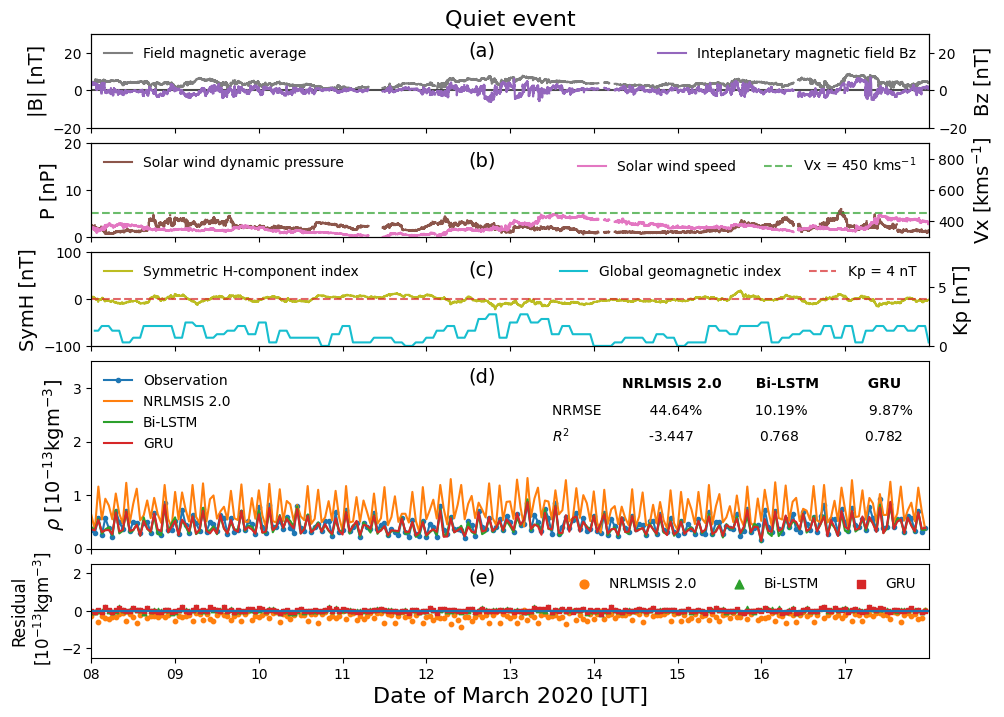

In [25]:
y_true  = df_Quiet_NRLMSIS['Density']
y_model = df_Quiet_NRLMSIS['Density_model']
y_pred = df_Quiet_BiLSTM
y_pred_GRU = df_Quiet_GRU
####################### NRLMSIS 2.0  #################################
#NRMSE
MSE_model = mean_squared_error(y_true, y_model)
RMSE_model = np.sqrt(MSE_model)
NRMSE_model = RMSE_model/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_model = r2_score(y_true, y_model)
###################### Evaluion with BiLSTM ########################
#NRMSE
MSE_BiLSTM = mean_squared_error(y_true, y_pred)
RMSE_BiLSTM = np.sqrt(MSE_BiLSTM)
NRMSE_BiLSTM = RMSE_BiLSTM/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_BiLSTM = r2_score(y_true, y_pred)
###################### Evaluion with GRU ###########################
#NRMSE
MSE_GRU = mean_squared_error(y_true, y_pred_GRU)
RMSE_GRU = np.sqrt(MSE_GRU)
NRMSE_GRU = RMSE_GRU/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_GRU = r2_score(y_true, y_pred_GRU)
#####################################################################
#Create figure
f, (axes5, axes2,axes3,axes4,axes1) = plt.subplots(5, 1, figsize=(10, 7), \
                        sharex=True, gridspec_kw={'height_ratios': [1,1,1,2,1]})

axes4.plot(df_Quiet_NRLMSIS.index, df_Quiet_NRLMSIS['Density']*1e13, marker = '.',
          label = "Observation")
axes4.plot(df_Quiet_NRLMSIS.index, df_Quiet_NRLMSIS['Density_model']*1e13,
          label = "NRLMSIS 2.0")
axes4.plot(df_Quiet_NRLMSIS.index, 1e13*df_Quiet_BiLSTM,
          label = "Bi-LSTM")
axes4.plot(df_Quiet_NRLMSIS.index, 1e13*df_Quiet_GRU,
          label = "GRU")

axes4.set_ylim(0,3.5)

#Shows evaluion
axes4.text(Timestamp('2020-03-14 08:00:00'), 3, 'NRLMSIS 2.0'f'{" ":7}'
                                                 'Bi-LSTM' f'{" ":10}'
                                                 'GRU', size=10, weight='bold')
axes4.text(Timestamp('2020-03-13 12:00:00'), 2.5, 'NRMSE' f'{" ":11}'
                                                          '{:.2%}'.format(NRMSE_model)+f'{" ":12}'+
                                                          '{:.2%}'.format(NRMSE_BiLSTM)+f'{" ":14}'+
                                                          '{:.2%}'.format(NRMSE_GRU), size=10)
axes4.text(Timestamp('2020-03-13 12:00:00'), 2.0, '$R^2$ ' f'{" ":17}'
                                                        '{:.3f}'.format(R_SQURE_model)+f'{" ":15}'+
                                                        '{:.3f}'.format(R_SQURE_BiLSTM)+f'{" ":15}'+
                                                        '{:.3f}'.format(R_SQURE_GRU), size=10)

axes4.set_ylabel(r'$\rho$' " [$\mathregular{10^{-13} kgm^{-3}}$]", size=14)
axes1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
axes1.set_xlabel('Date of March 2020 [UT]', size=16)
axes4.legend(edgecolor='white', loc='upper left')
axes5.set_title('Quiet event', size=16
               , loc='center')

axes2_2 = axes2.twinx()
axes3_2 = axes3.twinx()
axes5_2 = axes5.twinx()
#############################################
axes5.plot(sw_Quiet.index, sw_Quiet.Btotal, color='tab:gray')
axes5.set_ylim(-20,30)
axes5.set_ylabel("|B| [nT]", size=14)
axes5.legend(['Field magnetic average'],loc='upper left', facecolor='None', edgecolor='None')

axes5_2.plot(sw_Quiet.index, sw_Quiet.Bz, color='tab:purple')
axes5_2.set_ylim(-20,30)
axes5_2.set_ylabel("Bz [nT]", size=14)
axes5_2.legend(['Inteplanetary magnetic field Bz'],loc='upper right', facecolor='None', edgecolor='None')
axes5.axhline(y=0, color="black", linestyle="-", alpha=0.7)
#############################################
axes1.scatter(df_Quiet_NRLMSIS.index, df_Quiet_NRLMSIS['Density']*1e13-df_Quiet_NRLMSIS['Density_model']*1e13,
              color='tab:orange', alpha=1, s=10)
axes1.scatter(df_Quiet_NRLMSIS.index, df_Quiet_NRLMSIS['Density']*1e13-1e13*df_Quiet_BiLSTM, marker = '^',
              color='tab:green', alpha=1, s=10)
axes1.scatter(df_Quiet_NRLMSIS.index, df_Quiet_NRLMSIS['Density']*1e13-1e13*df_Quiet_GRU, marker = 's',
              color='tab:red', alpha=1, s=10)
axes1.set_ylim(-2.5,2.5)
axes1.set_ylabel('Residual\n' " [$\mathregular{10^{-13} kgm^{-3}}$]", size=12)
axes1.legend(['NRLMSIS 2.0', 'Bi-LSTM', 'GRU'],markerscale=2 ,loc='upper right',
             edgecolor='white',ncol = 3)
axes1.axhline(y=0, color="tab:blue", linestyle="-", alpha=1)
#############################################
axes2.plot(sw_Quiet.index, sw_Quiet.P, color='tab:brown')
axes2.set_ylim(0,20)
axes2.set_ylabel("P [nP]", size=14)
axes2.legend(['Solar wind dynamic pressure'],loc='upper left',edgecolor='white')

axes2_2.plot(sw_Quiet.index, np.abs(sw_Quiet.Vx), color='tab:pink')
axes2_2.set_ylim(300,900)
axes2_2.set_ylabel("Vx [$\mathregular{km s^{-1}}$]", size=14)
axes2_2.axhline(y=450, color="tab:green", linestyle="--", alpha=0.7)
axes2_2.legend(['Solar wind speed','Vx = 450 $\mathregular{km s^{-1}}$'],
               loc='upper right',edgecolor='white', ncol = 2)
#############################################
axes3.plot(sw_Quiet.index, sw_Quiet.SymH, color='tab:olive')
axes3.set_ylim(-100,100)
axes3.set_ylabel("SymH [nT]", size=14)
axes3.legend(['Symmetric H-component index'], loc='upper left',edgecolor='white')

axes3_2.plot(dfKp.loc['2020-03-08':'2020-03-17'].index, dfKp.Kp.loc['2020-03-08':'2020-03-17']/10,  color='tab:cyan')
axes3_2.set_ylim(0,8)
axes3_2.set_ylabel("Kp [nT]", size=14)
axes3_2.axhline(y=4.0, color="tab:red", linestyle="--", alpha=0.7)
axes3_2.legend(['Global geomagnetic index','Kp = 4 nT'],loc='upper right',edgecolor='white', ncol = 2)

axes5.text(Timestamp('2020-03-12 12:00:00'), 18, '(a)', size=14)
axes2.text(Timestamp('2020-03-12 12:00:00'), 15, '(b)', size=14)
axes3.text(Timestamp('2020-03-12 12:00:00'), 50, '(c)', size=14)
axes4.text(Timestamp('2020-03-12 12:00:00'), 3.1, '(d)', size=14)
axes1.text(Timestamp('2020-03-12 12:00:00'), 1.5, '(e)', size=14)

axes2_2.margins(0, 0)
axes3_2.margins(0, 0)
axes5_2.margins(0, 0)
axes1.margins(0, 0)
axes2.margins(0, 0)
axes3.margins(0, 0)
axes4.margins(0, 0)
axes5.margins(0, 0)
plt.tight_layout(pad=0.1)
plt.show()

**CME-CME event**

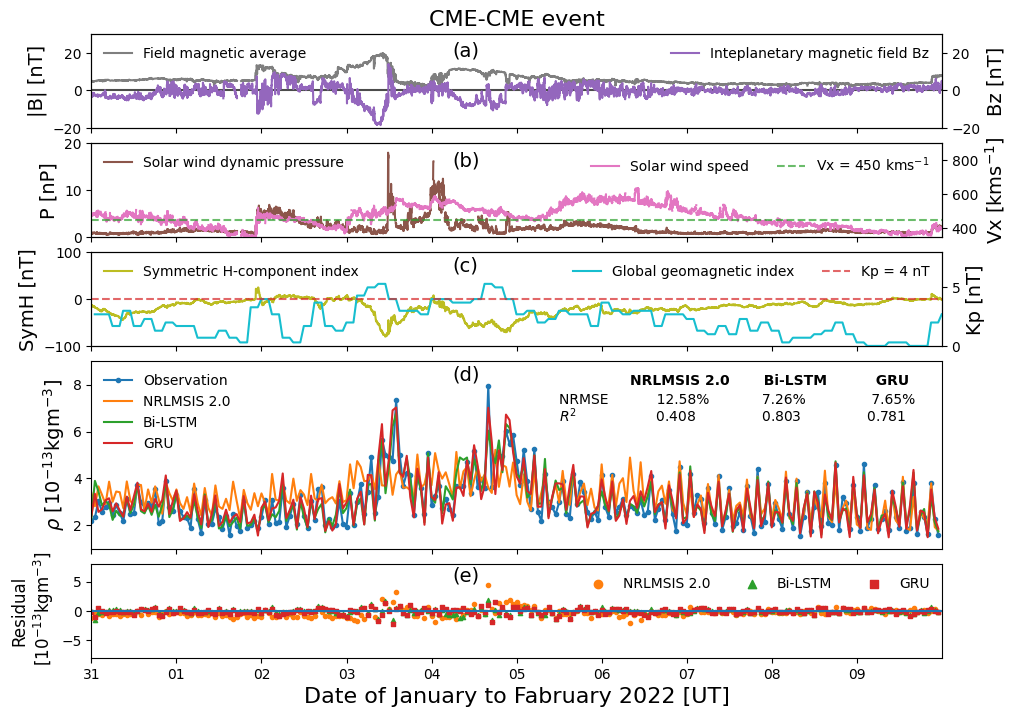

In [26]:
y_true  = df_CME_CME_NRLMSIS['Density']
y_model = df_CME_CME_NRLMSIS['Density_model']
y_pred = df_CME_CME_BiLSTM
y_pred_GRU = df_CME_CME_GRU
####################### NRLMSIS 2.0  #################################
#NRMSE
MSE_model = mean_squared_error(y_true, y_model)
RMSE_model = np.sqrt(MSE_model)
NRMSE_model = RMSE_model/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_model = r2_score(y_true, y_model)
###################### Evaluion with BiLSTM ########################
#NRMSE
MSE_BiLSTM = mean_squared_error(y_true, y_pred)
RMSE_BiLSTM = np.sqrt(MSE_BiLSTM)
NRMSE_BiLSTM = RMSE_BiLSTM/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_BiLSTM = r2_score(y_true, y_pred)
###################### Evaluion with GRU ###########################
#NRMSE
MSE_GRU = mean_squared_error(y_true, y_pred_GRU)
RMSE_GRU = np.sqrt(MSE_GRU)
NRMSE_GRU = RMSE_GRU/(np.max(y_true) - np.min(y_true))
#R_SQURE
R_SQURE_GRU = r2_score(y_true, y_pred_GRU)
#####################################################################
#Create figure
f, (axes5, axes2,axes3,axes4,axes1) = plt.subplots(5, 1, figsize=(10, 7), \
                        sharex=True, gridspec_kw={'height_ratios': [1,1,1,2,1]})

axes4.plot(df_CME_CME_NRLMSIS.index, df_CME_CME_NRLMSIS['Density']*1e13, marker = '.',
          label = "Observation")
axes4.plot(df_CME_CME_NRLMSIS.index, df_CME_CME_NRLMSIS['Density_model']*1e13,
          label = "NRLMSIS 2.0")
axes4.plot(df_CME_CME_NRLMSIS.index, 1e13*df_CME_CME_BiLSTM,
          label = "Bi-LSTM")
axes4.plot(df_CME_CME_NRLMSIS.index, 1e13*df_CME_CME_GRU,
          label = "GRU")

axes4.set_ylim(1,9)

#Shows evaluion
axes4.text(Timestamp('2022-02-06 08:00:00'), 8.0, 'NRLMSIS 2.0'f'{" ":7}'
                                                 'Bi-LSTM' f'{" ":10}'
                                                 'GRU', size=10, weight='bold')
axes4.text(Timestamp('2022-02-05 12:00:00'), 7.2, 'NRMSE' f'{" ":11}'
                                                          '{:.2%}'.format(NRMSE_model)+f'{" ":12}'+
                                                          '{:.2%}'.format(NRMSE_BiLSTM)+f'{" ":15}'+
                                                          '{:.2%}'.format(NRMSE_GRU), size=10)
axes4.text(Timestamp('2022-02-05 12:00:00'), 6.4, '$R^2$ ' f'{" ":17}'
                                                        '{:.3f}'.format(R_SQURE_model)+f'{" ":15}'+
                                                        '{:.3f}'.format(R_SQURE_BiLSTM)+f'{" ":15}'+
                                                        '{:.3f}'.format(R_SQURE_GRU), size=10)

axes4.set_ylabel(r'$\rho$' " [$\mathregular{10^{-13} kgm^{-3}}$]", size=14)
axes1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
axes1.set_xlabel('Date of January to Fabruary 2022 [UT]', size=16)
axes4.legend(edgecolor='white', loc='upper left')
axes5.set_title('CME-CME event', size=16
               , loc='center')

axes2_2 = axes2.twinx()
axes3_2 = axes3.twinx()
axes5_2 = axes5.twinx()
#############################################
axes5.plot(sw_CME_CME.index, sw_CME_CME.Btotal, color='tab:gray')
axes5.set_ylim(-20,30)
axes5.set_ylabel("|B| [nT]", size=14)
axes5.legend(['Field magnetic average'],loc='upper left', facecolor='None', edgecolor='None')

axes5_2.plot(sw_CME_CME.index, sw_CME_CME.Bz, color='tab:purple')
axes5_2.set_ylim(-20,30)
axes5_2.set_ylabel("Bz [nT]", size=14)
axes5_2.legend(['Inteplanetary magnetic field Bz'],loc='upper right', facecolor='None', edgecolor='None')
axes5.axhline(y=0, color="black", linestyle="-", alpha=0.7)
#############################################
axes1.scatter(df_CME_CME_NRLMSIS.index, df_CME_CME_NRLMSIS['Density']*1e13-df_CME_CME_NRLMSIS['Density_model']*1e13,
              color='tab:orange', alpha=1, s=9)
axes1.scatter(df_CME_CME_NRLMSIS.index, df_CME_CME_NRLMSIS['Density']*1e13-1e13*df_CME_CME_BiLSTM, marker = '^',
              color='tab:green', alpha=1, s=9)
axes1.scatter(df_CME_CME_NRLMSIS.index, df_CME_CME_NRLMSIS['Density']*1e13-1e13*df_CME_CME_GRU, marker = 's',
              color='tab:red', alpha=1, s=9)
axes1.set_ylim(-8,8)
axes1.set_ylabel('Residual\n' " [$\mathregular{10^{-13} kgm^{-3}}$]", size=12)
axes1.legend(['NRLMSIS 2.0', 'Bi-LSTM', 'GRU'],markerscale=2 ,loc='upper right',
             edgecolor='white',ncol = 3)
axes1.axhline(y=0, color="tab:blue", linestyle="-", alpha=1)
#############################################
axes2.plot(sw_CME_CME.index, sw_CME_CME.P, color='tab:brown')
axes2.set_ylim(0,20)
axes2.set_ylabel("P [nP]", size=14)
axes2.legend(['Solar wind dynamic pressure'],loc='upper left',edgecolor='white')

axes2_2.plot(sw_CME_CME.index, np.abs(sw_CME_CME.Vx), color='tab:pink')
axes2_2.set_ylim(350,900)
axes2_2.set_ylabel("Vx [$\mathregular{km s^{-1}}$]", size=14)
axes2_2.axhline(y=450, color="tab:green", linestyle="--", alpha=0.7)
axes2_2.legend(['Solar wind speed','Vx = 450 $\mathregular{km s^{-1}}$'],
               loc='upper right',edgecolor='white', ncol = 2)
#############################################
axes3.plot(sw_CME_CME.index, sw_CME_CME.SymH, color='tab:olive')
axes3.set_ylim(-100,100)
axes3.set_ylabel("SymH [nT]", size=14)
axes3.legend(['Symmetric H-component index'], loc='upper left',edgecolor='white')

axes3_2.plot(dfKp.loc['2022-01-31':'2022-02-09'].index, dfKp.Kp.loc['2022-01-31':'2022-02-09']/10,  color='tab:cyan')
axes3_2.set_ylim(0,8)
axes3_2.set_ylabel("Kp [nT]", size=14)
axes3_2.axhline(y=4.0, color="tab:red", linestyle="--", alpha=0.7)
axes3_2.legend(['Global geomagnetic index','Kp = 4 nT'],loc='upper right',edgecolor='white', ncol = 2)

axes5.text(Timestamp('2022-02-04 06:00:00'), 18, '(a)', size=14)
axes2.text(Timestamp('2022-02-04 06:00:00'), 15, '(b)', size=14)
axes3.text(Timestamp('2022-02-04 06:00:00'), 60, '(c)', size=14)
axes4.text(Timestamp('2022-02-04 06:00:00'), 8.2, '(d)', size=14)
axes1.text(Timestamp('2022-02-04 06:00:00'), 5, '(e)', size=14)

axes2_2.margins(0, 0)
axes3_2.margins(0, 0)
axes5_2.margins(0, 0)
axes1.margins(0, 0)
axes2.margins(0, 0)
axes3.margins(0, 0)
axes4.margins(0, 0)
axes5.margins(0, 0)
plt.tight_layout(pad=0.1)
plt.show()